# Aula 7, 6/outubro/2016

## Será que conseguiriamos prever 'atividade por semana'?

a partir de altura, peso, time e IMC??

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('alunos.csv')

df['IMC'] = df.Peso/((df.Altura/100) ** 2)

In [ ]:
df.head()

In [ ]:
del df['Time']

In [ ]:
# df['Time'].fillna('ND', inplace=True)

In [ ]:
df.columns

In [ ]:
# X, y = df[[u'Altura', u'Peso', u'IMC', u'Time']], df[u'Atividade_por_semana']
# X, y = df[[u'Altura', u'Peso', u'IMC']], df[u'Atividade_por_semana']
X, y = df[[u'Altura', u'Peso']], df[u'Atividade_por_semana']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# X.Time.unique()

In [ ]:
# X = pd.get_dummies(X, columns = ['Time'], drop_first=True)

In [ ]:
X.head()

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [ ]:
lreg = LinearRegression()

In [ ]:
lreg.fit(X_train, y_train)

In [ ]:
pred = pd.Series(lreg.predict(X_valid), index = y_valid.index)
pred

In [ ]:
res_valid = pd.concat([pred, y_valid], axis = 1)

In [ ]:
res_valid.columns = ['pred', 'gold']

In [ ]:
res_valid

In [ ]:
res_valid['erro'] = (res_valid.pred - res_valid.gold) ** 2

In [ ]:
res_valid

In [ ]:
mse = np.mean(res_valid.erro)
print 'MSE =', mse
print 'RMSE =', np.sqrt(mse)

In [ ]:
X.head()

In [ ]:
X.head()

In [ ]:
lreg

In [ ]:
df_teste = pd.DataFrame([[193, 93, 93.0/(1.93 ** 2)], [175, 114, 114.0/(1.75 ** 2)], 
                         [184, 100, 100.0/(1.84 ** 2)]])

In [ ]:
df_teste

In [ ]:
lreg.predict(df_teste)

In [ ]:
lreg.predict([[176, 80, 80.0/(1.76*1.76)]])

## Regressão Logistica

In [1]:
# import de modulos pandas e numpy
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# import de modulos para graficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# imports para Machine Learning 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# para avaliacao
from sklearn import metrics

# dataset
import statsmodels.api as sm

### Função logística

A função logistica [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function) recebe como argumento uma valor de $-\infty$ a $+\infty$, e retorna um valor no intervalo $(0,1)$

$$ \sigma (t)= \frac{1}{1+e^{-t}}$$

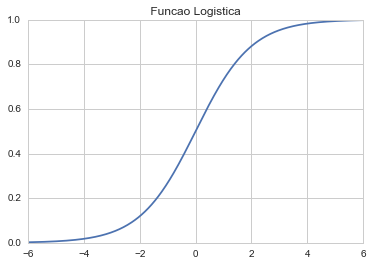

In [2]:
# Função Logistica
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# cria um grade de -6 a 6 ( 500 elementos, igualmente espaçados)
x_grade = np.linspace(-6,6,500)

# calcula os valores de y
y = np.array([logistic(x) for x in x_grade])

# melhor usar exp do numpy que aceita um vetor como argumento
y = 1/(1 + np.exp(-1.0 * x_grade))

# plot
plt.plot(x_grade,y)
plt.title(' Funcao Logistica ')

A ideia é considerar a função logistica gerando uma probabilidade, a partir de um polinomio:


$$ y = a_0 + a_1.x_{1} + a_2.x_{2} ... + a_m.x_{m}$$

onde $a_0, a_1, ..., a_m$ são coeficientes a serem aprendidos, de forma que a equação abaixo:<br>


$$ F(x)= \frac{1}{1+e^{-(a_0 + a_1.x_{1} + a_2.x_{2} ... + a_m.x_{m})}}$$

forneça a 'melhor' probabilidade de sucesso. 

Para tanto o algoritmo procura encontrar os melhores $a_0, a_1, ..., a_m$ que minimizam o erro. 

Na predição, o $x^{(i)}$ fornece um $F(x^{(i)})$. 
* Se $F(x^{(i)}) \leq 0.5$, predição será a classe 0
* Se $F(x^{(i)}) > 0.5$, predição será a classe 1

#### Exemplo prático

In [3]:
import webbrowser

url = 'http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html'

webbrowser.open_new(url)

True

Quantidade de observações: 6366
Quantidade de features: 9
Definições:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs


In [4]:
# Carrega dataframe 

df = sm.datasets.fair.load_pandas().data

In [5]:
df.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
2516,4.0,27.0,9.0,2.0,3.0,12.0,3.0,4.0,0.000000
1234,4.0,37.0,16.5,2.0,2.0,12.0,4.0,4.0,1.187878
4542,4.0,17.5,2.5,0.0,2.0,14.0,4.0,4.0,0.000000
352,2.0,37.0,16.5,5.5,2.0,12.0,2.0,5.0,2.545454
1040,5.0,22.0,6.0,2.0,3.0,12.0,2.0,5.0,0.166667


In [6]:
# Define uma coluna, indicador binário que indica se a pessoa teve um caso extra-conjugal
df['pulou_a_cerca'] = [ 1 if a else 0 for a in df.affairs]

In [7]:
df.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,pulou_a_cerca
1649,4.0,27.0,2.5,0.0,1.0,14.0,5.0,5.0,7.839996,1
5934,5.0,37.0,23.0,3.0,3.0,12.0,2.0,4.0,0.000000,0
3541,4.0,22.0,2.5,0.0,1.0,12.0,5.0,4.0,0.000000,0
545,1.0,27.0,2.5,0.0,2.0,16.0,3.0,1.0,4.799999,1
3523,4.0,42.0,23.0,3.0,4.0,17.0,3.0,6.0,0.000000,0


In [8]:
# Media por cada label
df.groupby('pulou_a_cerca').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
pulou_a_cerca,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


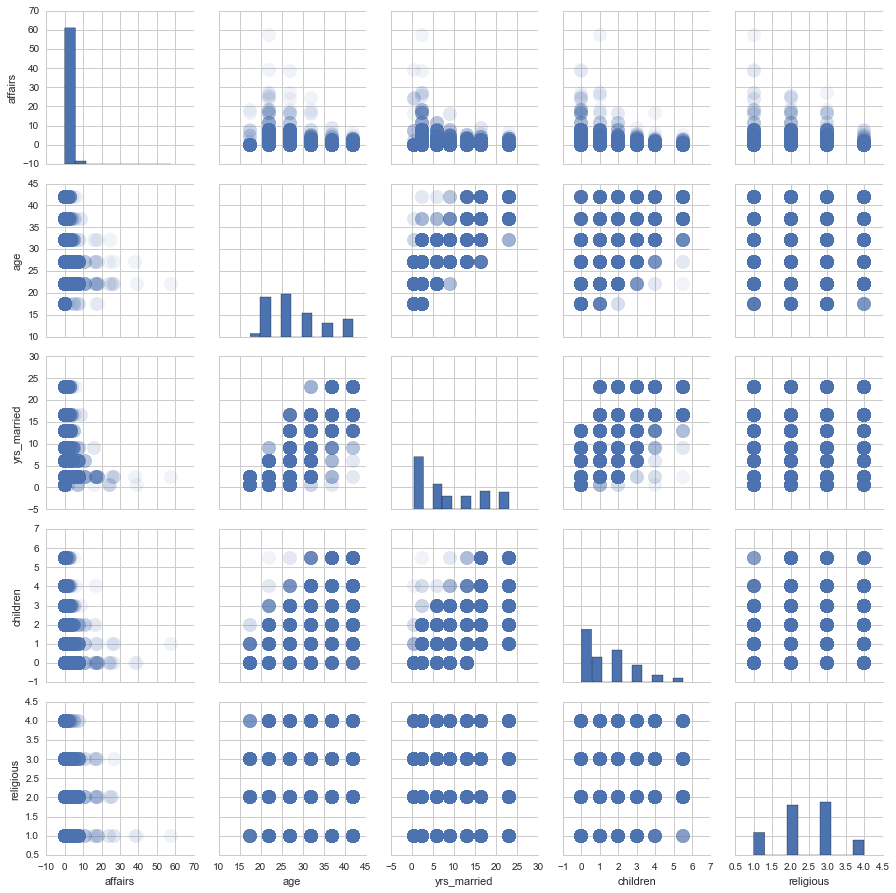

In [9]:
sns.pairplot(data=df[['affairs', 'age', 'yrs_married', 'children', 'religious']], 
        plot_kws = {'alpha':0.08, 's':180, 'edgecolor': None}, )

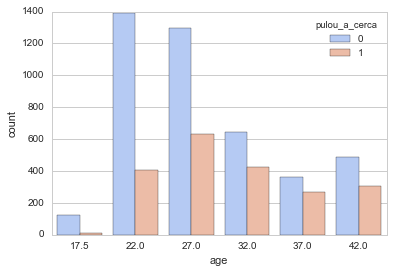

In [10]:
# Countplot com idade
sns.countplot(data=df, x='age', hue='pulou_a_cerca', palette='coolwarm')

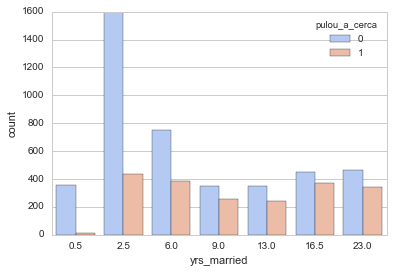

In [11]:
# Countplot com anos de casamento
sns.countplot('yrs_married',data=df,hue='pulou_a_cerca',palette='coolwarm')

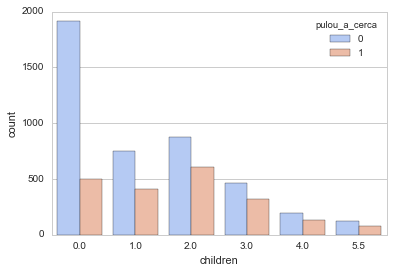

In [12]:
# Countplot com quantidade de filhos
sns.countplot('children',data=df,hue='pulou_a_cerca',palette='coolwarm')

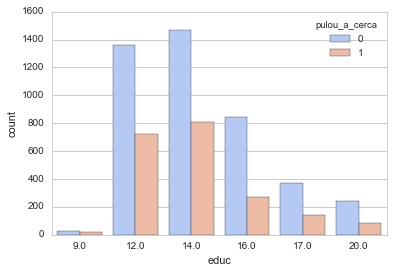

In [13]:
# Countplot com nivel de educação
sns.countplot('educ',data=df,hue='pulou_a_cerca',palette='coolwarm')

(0, 15)

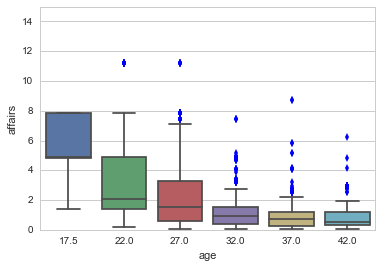

In [14]:
# considerando que a pessoa teve um caso extra-conjugal, 
# visualizacão da distribuição por boxplot
sns.boxplot(data=df[df.affairs > 0], x='age', y = 'affairs')
plt.ylim(0, 15)

(0, 15)

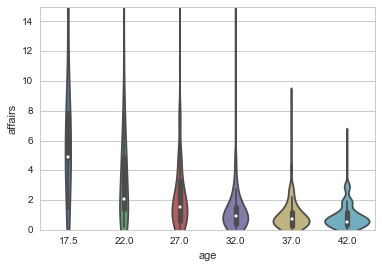

In [15]:
# considerando que a pessoa teve um caso extra-conjugal, 
# visualizacão da distribuição por violinplot
sns.violinplot(data=df[df.affairs > 0], x='age', y = 'affairs')
plt.ylim(0, 15)

#### pre-processamento

Notamos as variaveis categoricas Occupation e Husband's Occupation. De maneira similar a regressão linear, precisamos tratar essas colunas. Nesse caso, fazemos um OHE (one hot encoding). Importante: Labelencoding não funciona!!

Pandas tem um método para criar esses [dummy variables](http://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29) criando colunas dedicadas para cada valor encontrado.

In [16]:
# Cria novo DataFrame para as colunas categoricas
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
# Atribui nomes as colunas
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [18]:
# Atribui X primeiramente sem as colunas categoricas 
X = df.drop(['occupation','occupation_husb','pulou_a_cerca'],axis=1)

# Concatena os dataframes dummies
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [19]:
# Concatena o X com o dataframe dos dummies
X = pd.concat([X,dummies],axis=1)

# amostragem do X
X.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
4343,4.0,32.0,9.0,1.0,3.0,20.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6229,3.0,22.0,2.5,1.0,3.0,12.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1176,4.0,42.0,16.5,3.0,2.0,14.0,0.742424,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
679,1.0,32.0,13.0,2.0,2.0,16.0,1.507691,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6132,4.0,42.0,23.0,5.5,2.0,12.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
# Atribui y a coluna pulou_a_cerca
y = df.pulou_a_cerca

# amostragem do y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: pulou_a_cerca, dtype: int64

#### multicolinearidade

Notar que nos dataframe com as variaveis dummies, uma das colunas é combinação linear das outras.

Por exemplo, o valor da primeira coluna será igual a $1 - \sum_{i=2}^{k} x_i$, onde $x_i$ é o valor das coluna $i$ na mesma observação, e $k$ é a cardinalidade (quantidade de valores possíveis) da coluna categorica original.

Para remediar esse problema, bem simples, basta deletar uma das colunas.

In [21]:
# deletando uma coluna para cada coluna categorica
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# deletando coluna não utilizada
X = X.drop('affairs',axis=1)

# amostragem
X.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
5595,4.0,22.0,0.5,0.0,3.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2077,5.0,22.0,2.5,0.0,1.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
121,4.0,27.0,9.0,2.0,2.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3856,4.0,27.0,6.0,1.0,3.0,12.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5402,5.0,17.5,0.5,0.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# transformando em numpy
y = y.values

# checando resultado
y

array([1, 1, 1, ..., 0, 0, 0])

### alternativa

In [ ]:
# X = pd.get_dummies(df, columns=['occupation', 'occupation_husb'], 
#                    drop_first=True).drop(['affairs', 'pulou_a_cerca'], axis = 1)
# y = df.pulou_a_cerca.values

#### Rodando Regressão Logistica com sklearn 

In [26]:
# Instanciando objeto
log_model = LogisticRegression()

# Treinando o modelo
log_model.fit(X, y)

# Checando acurácia
log_model.score(X, y)

0.72588752748978946

In [27]:
# Checando a percentagem de mulheres com casos extra-conjugais
y.mean()

0.32249450204209867

In [28]:
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df.columns = ['feature', 'coeficiente']
coeff_df

,feature,coeficiente
0,rate_marriage,[-0.697979610477]
1,age,[-0.0563900201813]
2,yrs_married,[0.103938089226]
3,children,[0.0181481239809]
4,religious,[-0.368549612197]
5,educ,[0.00869521560953]
6,occ2,[0.298011326522]
7,occ3,[0.607975208198]
8,occ4,[0.346356014608]
9,occ5,[0.942605961316]


In [29]:
coeff_df['coeficiente'] = [i[0] for i in coeff_df.coeficiente]

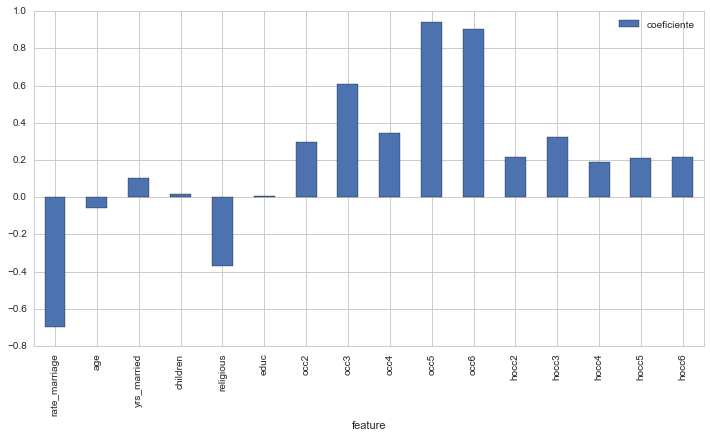

In [30]:
coeff_df.plot(kind='bar', x = 'feature', y = 'coeficiente', figsize=(12,6))

##### O que podemos observar pelos coeficientes acima?

### Treinamento e validação

In [31]:
# Segmentando a base
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instanciando um objeto
log_model2 = LogisticRegression()

# Treinando o modelo
log_model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [32]:
# Predizendo a classe das observações de teste
class_predict = log_model2.predict(X_test)

# Comparando as classes da predição e o gold, 
# ou seja, medindo a performance...
print metrics.accuracy_score(y_test,class_predict)

0.704145728643


In [33]:
# matriz de confusão
metrics.confusion_matrix(y_test, class_predict)

array([[955, 124],
       [347, 166]])

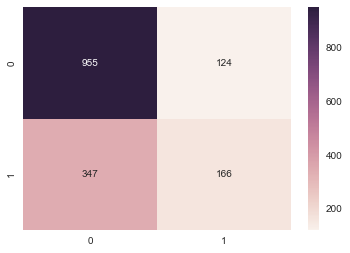

In [34]:
# Label gold na vertical, e label predição na horizontal
sns.heatmap(metrics.confusion_matrix(y_test, class_predict), annot=True, fmt ='d')

In [35]:
print metrics.classification_report(y_test, class_predict)

             precision    recall  f1-score   support

          0       0.73      0.89      0.80      1079
          1       0.57      0.32      0.41       513

avg / total       0.68      0.70      0.68      1592



### material adicional

Materiais disponiveis gratuitamente do Prof. Andrew Ng:

[MOOC Machine Learning](https://www.coursera.org/learn/machine-learning/home/welcome) <br>
[Curso CS229 no Youtube](https://www.youtube.com/playlist?list=PLA89DCFA6ADACE599) <br>
[Pagina do curso CS229](http://cs229.stanford.edu/)

# Aula 7, 13/outubro/2016

### Random Forests

Antes de falar de Random Forests vamos entender Decision Trees.

Texto interessante: [Random Forests](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411) 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

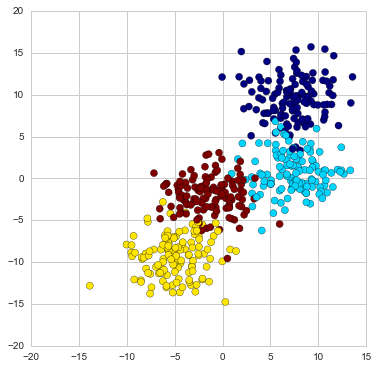

In [57]:
# Criando datasets
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap='jet')
# plt.scatter(X[:,0], X[:,1], s = 150, cmap='jet', alpha=0.1)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

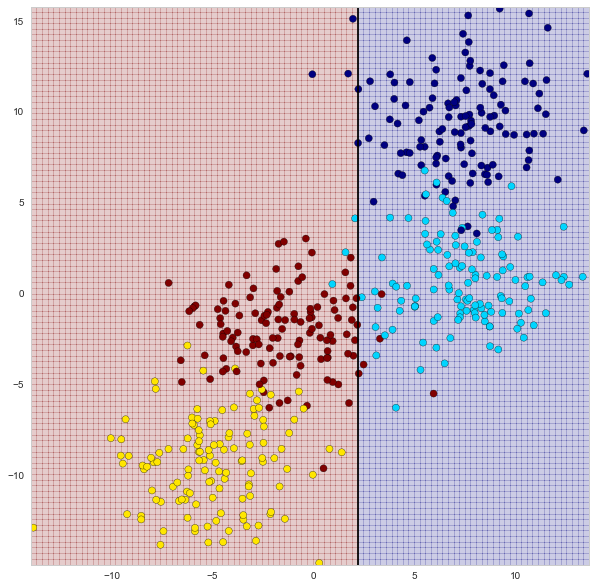

In [43]:
clf = DecisionTreeClassifier(max_depth=1, random_state=0)

visualize_tree(clf, X, y)

In [ ]:
np.bincount(y)

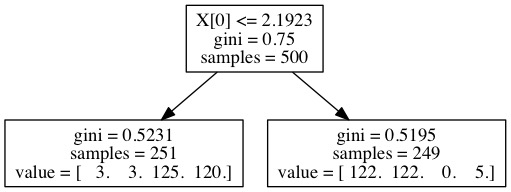

In [45]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot') 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('aula.jpg')

from IPython.display import Image 
Image('aula.jpg')

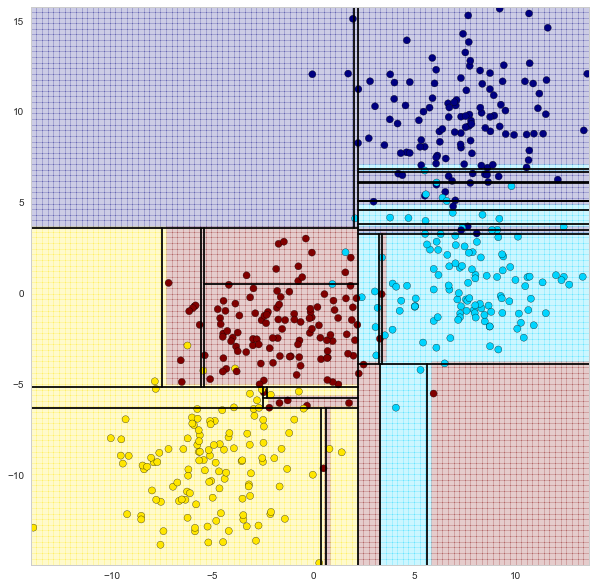

In [51]:
clf = DecisionTreeClassifier(max_depth=6, random_state=0)

visualize_tree(clf, X, y)

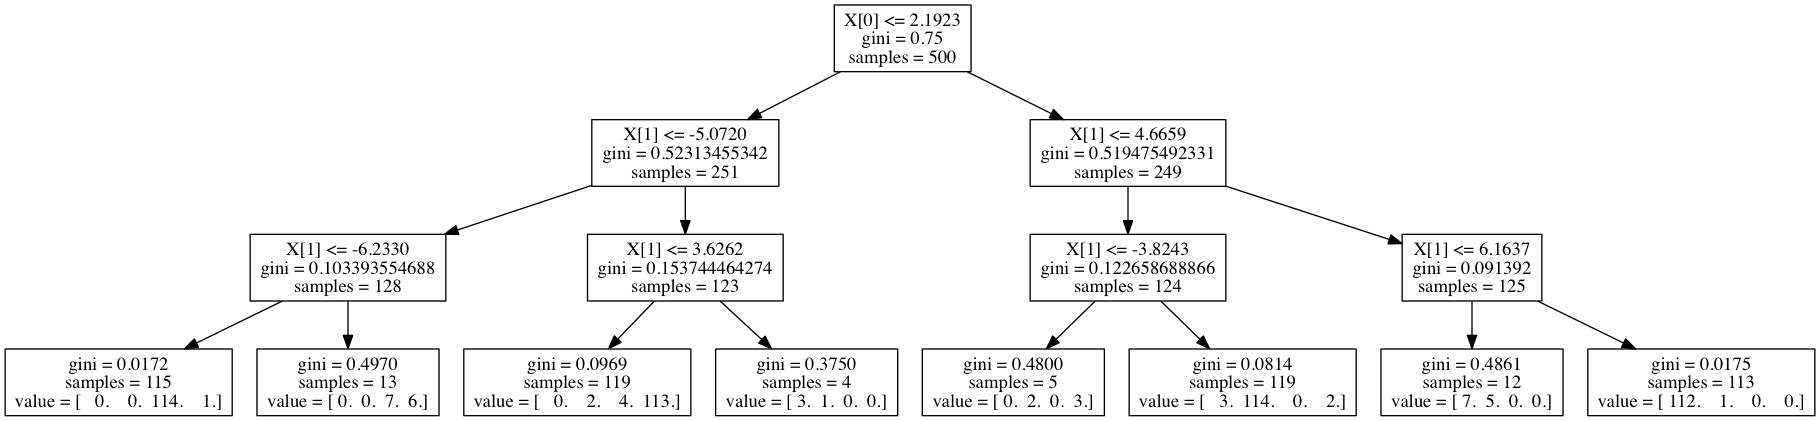

In [49]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot') 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('aula.jpg')

from IPython.display import Image 
Image('aula.jpg')

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

visualize_tree(clf, X, y)

Sinais de over-fitting: Muitas decisões de quebra levando a grupos muito granulares.

## Random Forests

Metodo baseado em ensemble, ou seja reune 'opiniões' de vários classificadores e tira-se a média das estimativas.
Esses classificadores são classificadores fracos (weak learner), e são assim denominados por que tem apenas uma visão parcial dos fatos. 

Uma parcialidade aleatórea forçada para cada classificador, técnica chamada de *bagging*. O objetivo do *bagging* é reduzir a variancia via um cancelamento de ruídos. 

No RF, os weak learners são decision trees, daí o termo 'forests' para o ensemble.    

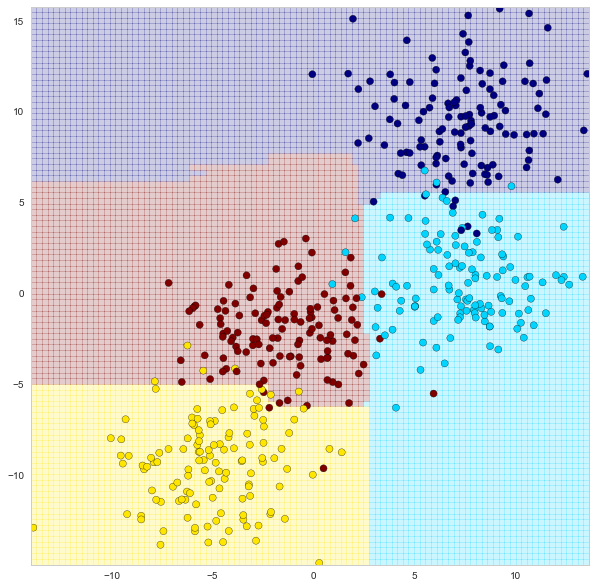

In [70]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0, max_depth=3)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)

In [71]:
from sklearn import metrics

In [72]:
y_pred = clf.predict(X)

In [73]:
print metrics.accuracy_score(y, y_pred)

0.954


# Aula 8, 20/outubro/2016

### Classificação não supervisionada. K-means

In [1]:
from IPython.display import Image 
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/197px-K_Means_Example_Step_1.svg.png')

In [2]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/197px-K_Means_Example_Step_2.svg.png')

In [3]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/197px-K_Means_Example_Step_3.svg.png')

In [4]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/197px-K_Means_Example_Step_4.svg.png')

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# Criando datasets
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, random_state=8, cluster_std=2.4)

In [4]:
def plot_blobs(um_X, um_classificador=None):
    x_min, x_max = um_X[:, 0].min() - 2, um_X[:, 0].max() + 2
    y_min, y_max = um_X[:, 1].min() - 2, um_X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

    plt.figure(1)
    plt.clf()
    
    plt.plot(um_X[:, 0], um_X[:, 1], 'k.', markersize=10, alpha = 0.5)
    
    if um_classificador:
        Z = um_classificador.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        centroids = um_classificador.cluster_centers_
        inert = um_classificador.inertia_
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3, color='w', zorder=8)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

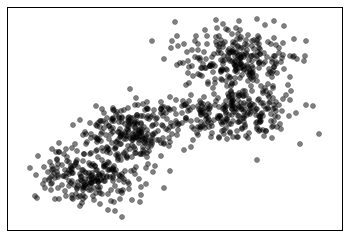

In [5]:
plot_blobs(X)

In [6]:
k_means = KMeans(n_clusters=4)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

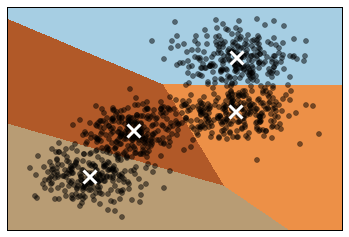

In [7]:
plot_blobs(X, k_means)

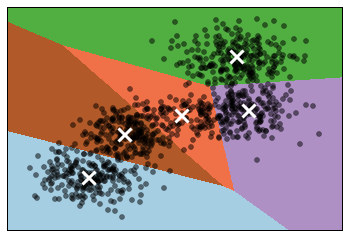

In [9]:
k_means = KMeans(n_clusters=5)
k_means.fit(X)
plot_blobs(X, k_means)

### Exemplo real

In [10]:
import pandas as pd
from sklearn.cross_validation import train_test_split

data = pd.read_csv('household_power_consumption.txt', delimiter=';')
power_consumption = data.iloc[0:, 2:9].dropna()
pc_toarray = power_consumption.values
hpc_fit, hpc_fit1 = train_test_split(pc_toarray, train_size=.01)
power_consumption.head()

/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [12]:
%pylab inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

hpc = PCA(n_components=2).fit_transform(hpc_fit)
k_means = KMeans()
k_means.fit(hpc)

Populating the interactive namespace from numpy and matplotlib


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

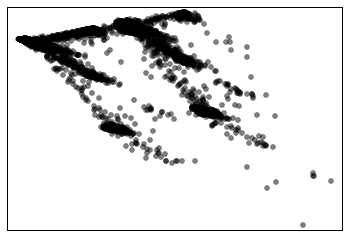

In [13]:
plot_blobs(hpc)

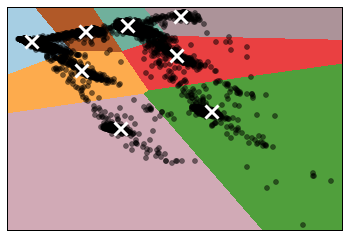

In [14]:
plot_blobs(hpc, k_means)

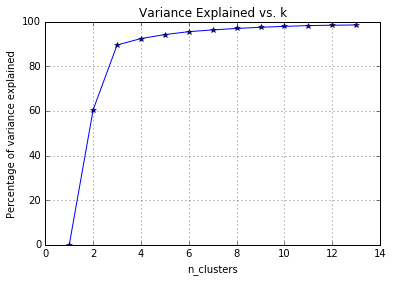

In [15]:
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,14)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(hpc) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(hpc, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(hpc)**2)/hpc.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')

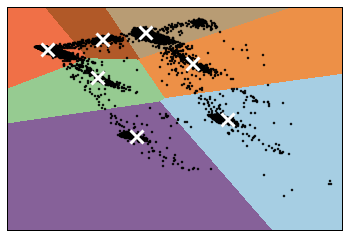

In [16]:
# run 8/random, 7/kmeans++ for silhouette
k_means = KMeans(n_clusters=7)
k_means.fit(hpc)

x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min() + 1, hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize=4)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [17]:
from sklearn.metrics import silhouette_score

labels = k_means.labels_
silhouette_score(hpc, labels, metric='euclidean')

0.79735827524914327

In [21]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import numpy as np

# %matplotlib inline

# # Criando datasets
# from sklearn.datasets import make_blobs

# X, y = make_blobs(n_samples=1000, centers=4, random_state=8, cluster_std=2.4)

# def plot_blobs(um_X, um_classificador=None):
#     x_min, x_max = um_X[:, 0].min() - 2, um_X[:, 0].max() + 2
#     y_min, y_max = um_X[:, 1].min() - 2, um_X[:, 1].max() + 2
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

#     plt.figure(1)
#     plt.clf()
    
#     plt.plot(um_X[:, 0], um_X[:, 1], 'k.', markersize=10, alpha = 0.5)
    
#     if um_classificador:
#         Z = um_classificador.predict(np.c_[xx.ravel(), yy.ravel()])
#         Z = Z.reshape(xx.shape)
#         plt.imshow(Z, interpolation='nearest',
#                    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#                    cmap=plt.cm.Paired,
#                    aspect='auto', origin='lower')

#         centroids = um_classificador.cluster_centers_
#         inert = um_classificador.inertia_
#         plt.scatter(centroids[:, 0], centroids[:, 1],
#                     marker='x', s=169, linewidths=3, color='w', zorder=8)

#     plt.xlim(x_min, x_max)
#     plt.ylim(y_min, y_max)
#     plt.xticks(())
#     plt.yticks(())
#     plt.show()

# plot_blobs(X)

# k_means = KMeans(n_clusters=4)
# k_means.fit(X)

# plot_blobs(X, k_means)